In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#https://www.kaggle.com/datasets/shivamb/netflix-shows

In [2]:
df2 = pd.read_csv("C:/Users/chinm/Downloads/netflix_titles.csv")

In [3]:
df2.shape

(8807, 12)

In [4]:
df2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Convert date added to datetime
df2['date_added'] = pd.to_datetime(df2['date_added'])

In [7]:
df2.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [9]:
df2.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# There are many missing values in some variables. However, all of these are object data
# and it would make no sense to replace them by mode. But removing all of them also doesn't 
# make sense. Missing Director is about 25% of the total data.
# I'll add other values to director, cast and country and remove the rest

df2['director'].fillna('Other', inplace=True)
df2['cast'].fillna('Other', inplace=True)
df2['country'].fillna('Other', inplace=True)

df2.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [12]:
# Now there are no missing values

# Let's see if there are any columns with few unique values that could be converted to categorical

df2.nunique()

# 'type' can be converted and maybe rating. Nothing else

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          749
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

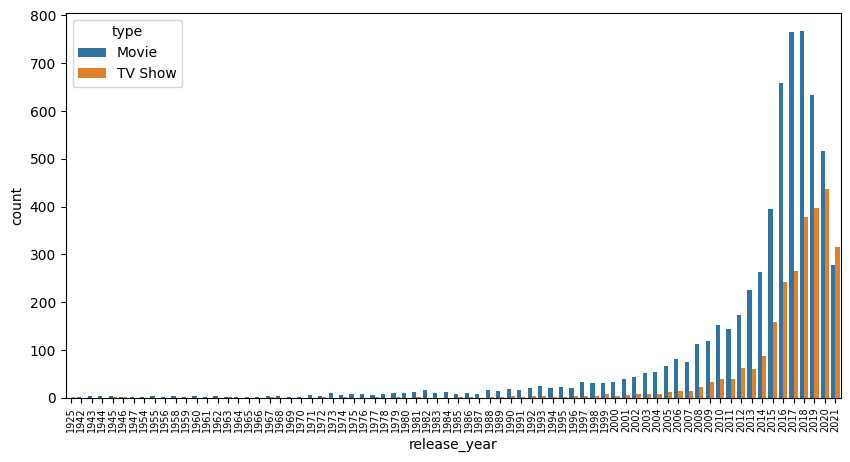

In [13]:
# Lets make a countplot of type released yearwise
plt.figure(figsize=(10,5))
ax = sns.countplot(x='release_year', hue='type', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
plt.show()

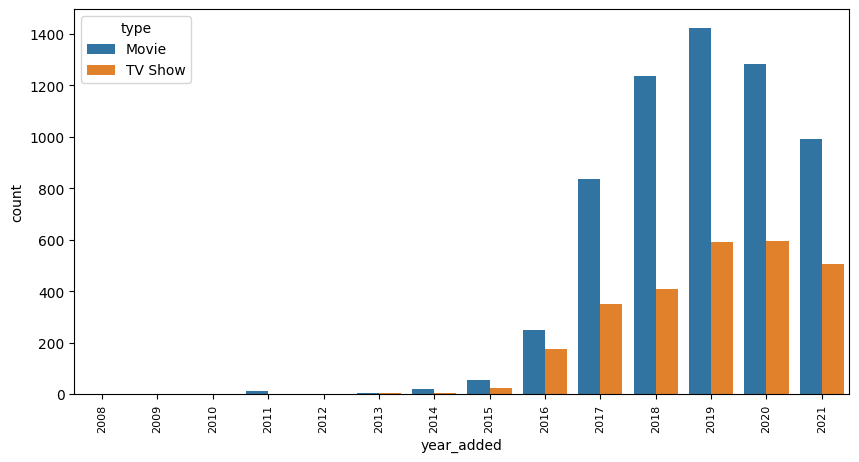

In [14]:
# Lets make a countplot of type added yearwise
df2['year_added'] = df2['date_added'].dt.year
plt.figure(figsize=(10,5))
ax = sns.countplot(x='year_added', hue='type', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
plt.show()

In [15]:
# Content added on Netflix has also increased exponentially since 2015. However, this has also seen a decreasing trend since 2019
# - Corona Effect??

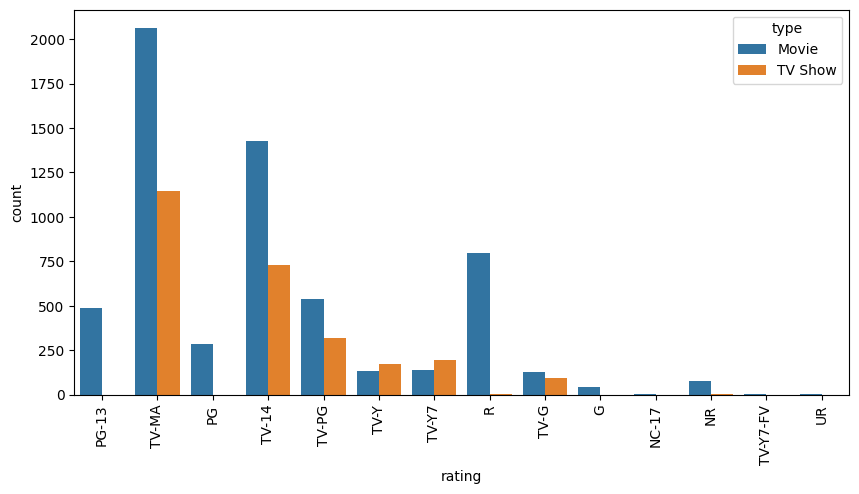

In [16]:
# Rating-wise content

plt.figure(figsize=(10,5))
ax = sns.countplot(x='rating', hue='type', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

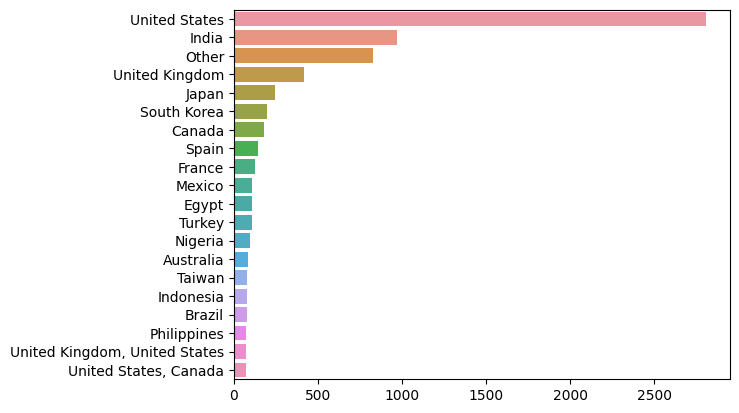

In [17]:
# Top 10 countries with most content

top20countries = df2['country'].value_counts(sort=True, ascending=False)[:20,]
sns.barplot(x=top20countries.values, y=top20countries.index)
plt.show()

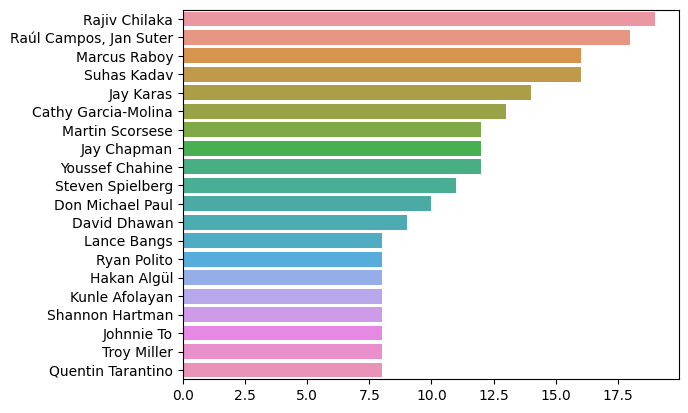

In [18]:
# Top Directors

top20directors = df2[df2['director'] != 'Other']['director'].value_counts(sort=True, ascending=False)[:20,]
sns.barplot(x=top20directors.values, y=top20directors.index)
plt.show()